In [25]:
# load the required files
import pandas as pd

species= pd.read_csv("C:\\Users\\riyab\\OneDrive\\Documents\\SQL Server Management Studio\\Biodiversity\\species_info.csv")
print("Species Data:")
print(species.head(5))



observation = pd.read_csv("C:\\Users\\riyab\\OneDrive\\Documents\\SQL Server Management Studio\\Biodiversity\\observations.csv")
print("Observation Data:")
print(observation.head(5))

Species Data:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
Observation Data:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         

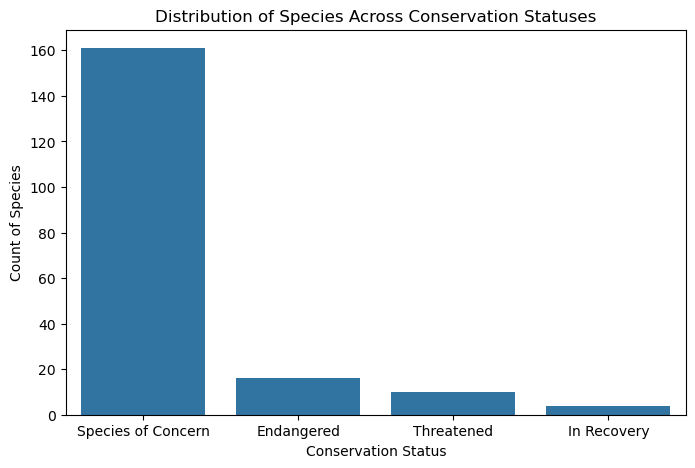

In [7]:
# solving few business problems using python - jupyter notebook


#1. Species Conservation Status Visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=species, x='conservation_status', order=species['conservation_status'].value_counts().index)
plt.title('Distribution of Species Across Conservation Statuses')
plt.xlabel('Conservation Status')
plt.ylabel('Count of Species')
plt.show()


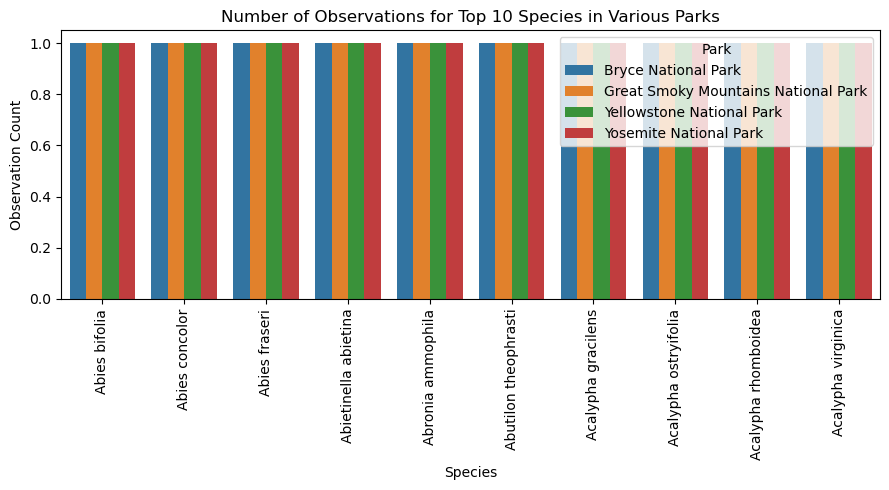

In [12]:
#2.  Species Observation Count by Park

observations = observations.groupby(['park_name', 'scientific_name']).size().reset_index(name='observation_count')
top_species = observations.groupby('scientific_name')['observation_count'].sum().nlargest(10).index

top_observations = observations[observations['scientific_name'].isin(top_species)]

plt.figure(figsize=(9, 5))
sns.barplot(data=top_observations, x='scientific_name', y='observation_count', hue='park_name')
plt.title('Number of Observations for Top 10 Species in Various Parks')
plt.xlabel('Species')
plt.ylabel('Observation Count')
plt.xticks(rotation=90)
plt.legend(title='Park')
plt.tight_layout()
plt.show()




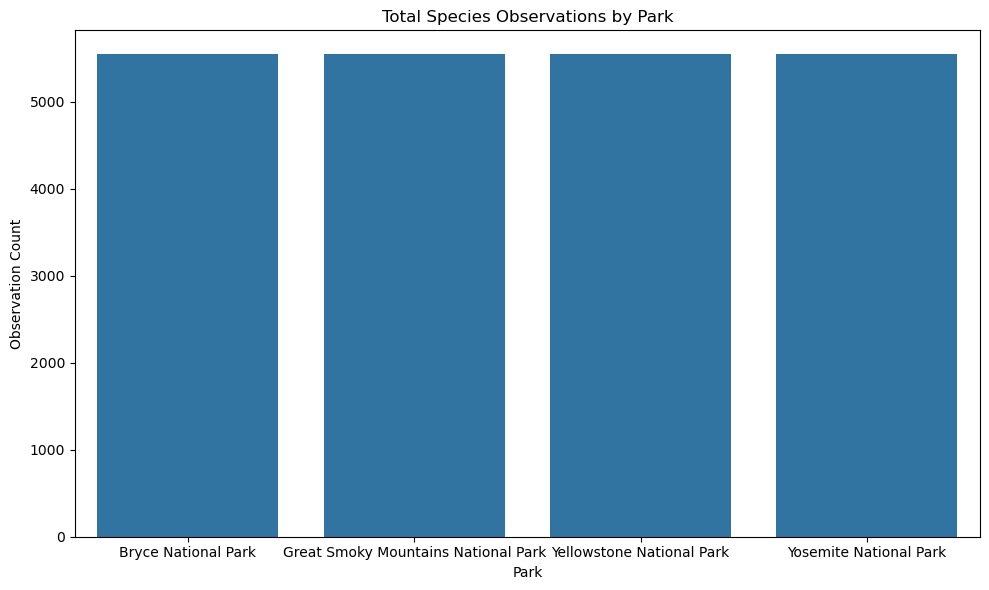

In [16]:
#3.  Temporal Analysis of Observations

total_observations = observations.groupby('park_name').size().reset_index(name='observation_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_observations, x='park_name', y='observation_count')
plt.title('Total Species Observations by Park')
plt.xlabel('Park')
plt.ylabel('Observation Count')
plt.tight_layout()
plt.show()


In [21]:
# 4.  Species Identification

def identify_frequent_species(observations, threshold=2):
    species_count = observations['scientific_name'].value_counts()
    frequent_species = species_count[species_count >= threshold]
    return frequent_species.reset_index(name='count')

frequent_species = identify_frequent_species(observations)
print(frequent_species)



                          scientific_name  count
0                           Abies bifolia      4
1                 Phegopteris connectilis      4
2                   Philadelphus hirsutus      4
3               Pheucticus melanocephalus      4
4                 Pheucticus ludovicianus      4
...                                   ...    ...
5536                   Empidonax wrightii      4
5537                  Empidonax virescens      4
5538                   Empidonax traillii      4
5539               Empidonax occidentalis      4
5540  Zygodon viridissimus var. rupestris      4

[5541 rows x 2 columns]


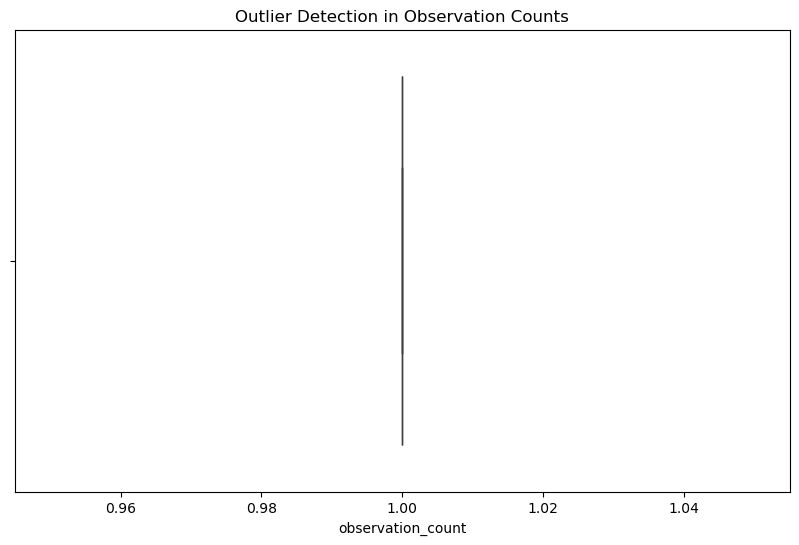

In [23]:
# 5. Outlier Detection

# Identifying outliers using IQR
Q1 = observations['observation_count'].quantile(0.25)
Q3 = observations['observation_count'].quantile(0.75)
IQR = Q3 - Q1

outliers = observations[(observations['observation_count'] < (Q1 - 1.5 * IQR)) |
                                 (observations['observation_count'] > (Q3 + 1.5 * IQR))]

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=observations, x='observation_count')
plt.title('Outlier Detection in Observation Counts')
plt.show()


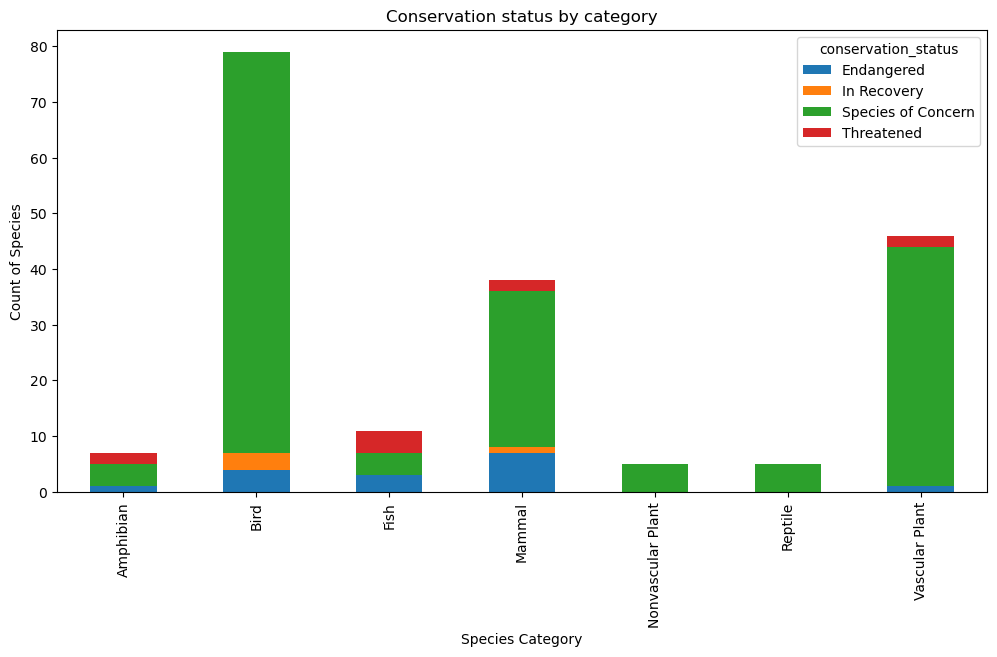

In [27]:
# 6. Group data by category and conservation status
category_conservation = species.groupby(['category', 'conservation_status']).size().unstack().fillna(0)

category_conservation.plot(kind= 'bar', stacked= True, figsize= (12,6))
plt.title('Conservation status by category')
plt.xlabel('Species Category')
plt.ylabel('Count of Species')

plt.show()

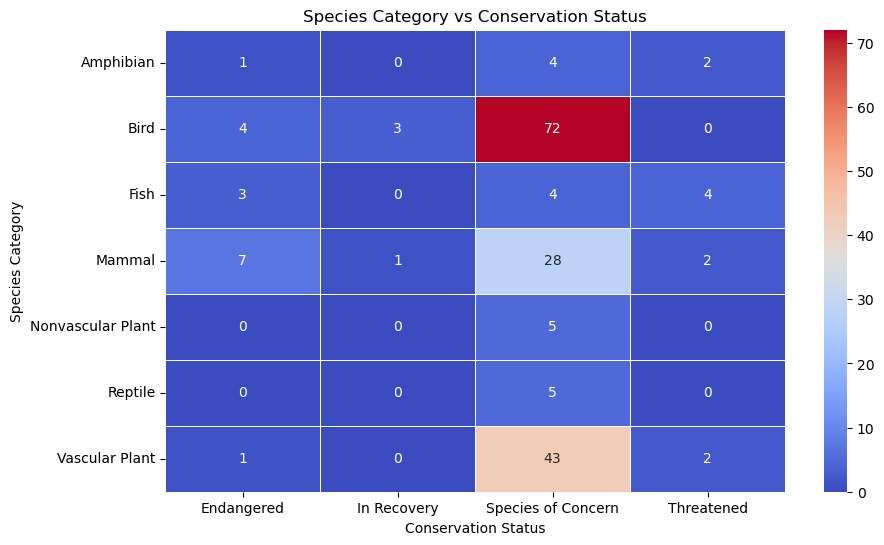

In [28]:
# 7. heatmap of category vs conservation status

plt.figure(figsize=(10, 6))
sns.heatmap(category_conservation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Species Category vs Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Species Category')
plt.show()



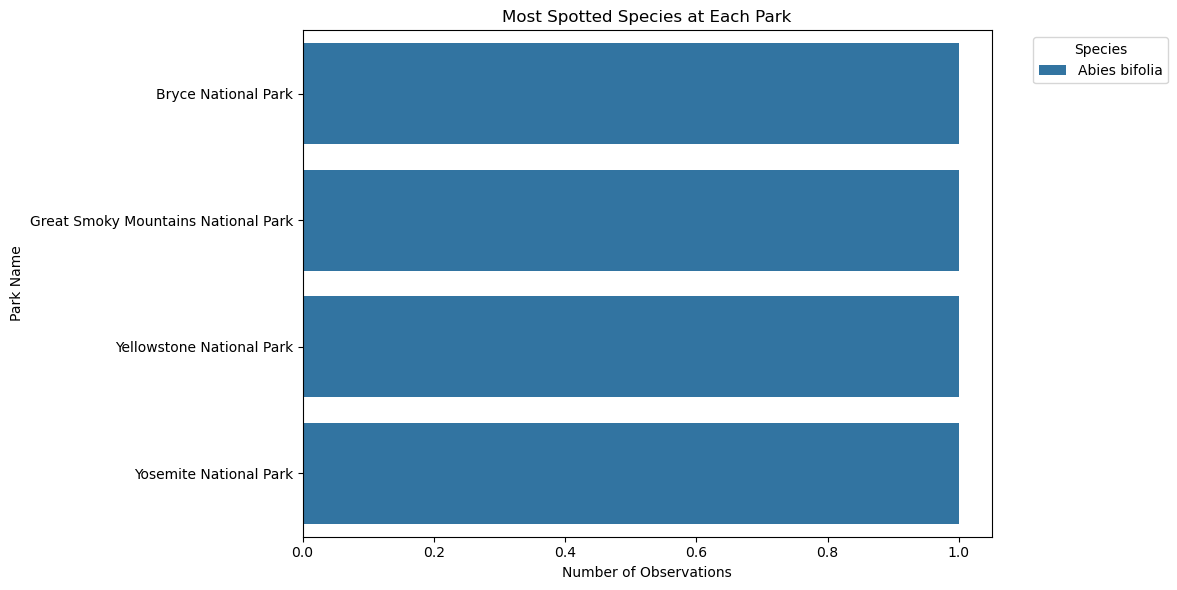

In [30]:

most_observed_species = observations.groupby(['park_name', 'scientific_name']).size().reset_index(name='observation_count')


most_observed_species_per_park = most_observed_species.loc[most_observed_species.groupby('park_name')['observation_count'].idxmax()]

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='observation_count', y='park_name', hue='scientific_name', data=most_observed_species_per_park, dodge=False)
plt.title('Most Spotted Species at Each Park')
plt.xlabel('Number of Observations')
plt.ylabel('Park Name')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()
